In [16]:
! pip install transformers dataset 
! pip install torch
! pip install tf-keras
! pip install pandas 

In [3]:
! pip install ffmpeg-python

OpenAi Whisper

In [2]:
from transformers import pipeline
import pandas as pd

# Hugging Face - Whisper AI Model
classifier = pipeline("automatic-speech-recognition", model="openai/whisper-medium", return_timestamps=True)


result = classifier(r"C:\Users\Anjali\Downloads\Axiom_Recording.mp4")


data = []


for segment in result['chunks']:  
    speaker = "Speaker 1" if len(data) % 2 == 0 else "Speaker 2"
    

    data.append({"speaker": speaker, "value": segment['text']})


df = pd.DataFrame(data)


df.to_csv(r"C:\Users\Anjali\Downloads\transcription_result.csv", sep='\t', index=False)

#output transcript saved
print("Results saved as CSV with tab separation.")


c:\Users\Anjali\anaconda3\Lib\site-packages\transformers\models\whisper\generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Results saved as CSV with tab separation.


roBERTa Sentiment Analysis

In [3]:
import pandas as pd
from transformers import pipeline

classifier = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

# Path to the CSV file
file_path = r'C:\Users\Anjali\Downloads\transcription_result.csv'

try:

    data = pd.read_csv(file_path, sep='\t')

    
    if 'value' in data.columns:
       
        data['Sentiment'] = data['value'].apply(lambda x: classifier(str(x))[0]['label'])
        
       
        sentiment_data = data[['Sentiment']]
        
       
        sentiment_counts = sentiment_data['Sentiment'].value_counts(normalize=True) * 100
        
        print("Sentiment Percentages:")
        print(sentiment_counts.to_string())
        
        
        sentiment_final = sentiment_counts.idxmax()
        
      
        
        
    else:
        print("Column 'value' does not exist in the data.")

except FileNotFoundError:
    print(f"File Not Found")
except Exception as e:
    print(f"ERROR: {e}")


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Sentiment Percentages:
Sentiment
neutral     57.142857
positive    40.000000
negative     2.857143


roBERTa Emotion Classification

In [ ]:
import pandas as pd
from transformers import pipeline
from collections import Counter

#Sentiment Analysis Model
pipe = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions")


file_path = r'C:\Users\Anjali\Downloads\transcription_result.csv'
df = pd.read_csv(file_path, sep='\t')  


emotion_counter = Counter()


for index, row in df.iterrows():
    text = row['value']
    results = pipe(text)
    
    
    emotion = results[0]['label']
  
    emotion_counter[emotion] += 1
    
   
    print(f"Text: {text}")
    print(f"Emotion Prediction: {emotion}\n")


print("Summary of Most Used Emotions:")
for emotion, count in emotion_counter.most_common():
    print(f"{emotion}: {count} occurrences")


Text:  To the outer space center on one special day, young Rocky and his grandma set off on their way.
Emotion Prediction: neutral

Text:  Kind of looks like they're at the Kennedy Space Center in Florida.
Emotion Prediction: neutral

Text:  Hey, grandma, asked Rocky, can I fly to the stars? Is it silly to dream of a visit to Mars?
Emotion Prediction: curiosity

Text:  Absolutely not, replied grandma. Not silly at all. I had the same dreams when I was so small.
Emotion Prediction: disapproval

Text:  But they laughed at me, Rocky, laughed right in my face, my teacher and friends, when I
Emotion Prediction: amusement

Text:  talked about space.
Emotion Prediction: neutral

Text:  Rocky asked, you talked about space?
Emotion Prediction: neutral

Text:  What did you say?
Emotion Prediction: neutral

Text:  That they made fun of you in a not a nice way.
Emotion Prediction: amusement

Text:  She replied, my nana told me on that very day that sometime in the future I'd be on
Emotion Predicti

In [1]:
! pip install librosa

   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/260.1 kB ? eta -:--:--
   ------ --------------------------------- 41.0/260.1 kB 1.9 MB/s eta 0:00:01
   --------- ----------------------------- 61.4/260.1 kB 648.1 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/260.1 kB 435.7 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/260.1 kB 476.3 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/260.1 kB 467.6 kB/s eta 0:00:01
   ----------------- -------------------- 122.9/260.1 kB 423.5 kB/s eta 0:00:01
   -------------------- ----------------- 143.4/260.1 kB 425.3 kB/s eta 0:00:01
   -------------------- ----------------- 143.4/260.1 kB 425.3 kB/s eta 0:00:01
   --

Identify Pitch w/ Librosa

In [5]:
import librosa
import numpy as np
import csv
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

audio_file = r"C:\Users\Anjali\Downloads\Axiom_Recording.mp4"
y, sr = librosa.load(audio_file, sr=16000)


lowcut = 80.0
highcut = 500.0
y_filtered = bandpass_filter(y, lowcut, highcut, sr)

fmin = librosa.note_to_hz('E2') 
fmax = librosa.note_to_hz('B4')  
pitches, voiced_flag, voiced_probs = librosa.pyin(y_filtered, fmin=fmin, fmax=fmax, sr=sr)


pitches = pitches[~np.isnan(pitches)]


csv_file = r"C:\Users\Anjali\Downloads\avgpitchwcutoff.csv"  
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Pitch (Hz)'])  
    for pitch in pitches:
        writer.writerow([pitch])


if len(pitches) > 0:
    average_pitch = np.mean(pitches)
    print(f"Refined Average Pitch: {average_pitch:.2f} Hz")
    print(f"Pitches saved to {csv_file}")
else:
    print("No valid pitch values detected.")


C:\Users\Anjali\AppData\Local\Temp\ipykernel_29860\1277085896.py:20: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=16000)
c:\Users\Anjali\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Refined Average Pitch: 159.44 Hz
Pitches saved to C:\Users\Anjali\Downloads\avgpitchwcutoff.csv


In [6]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\Anjali\Downloads\avgpitchwcutoff.csv"

data = pd.read_csv(file_path)
pitches = data['Pitch (Hz)'].dropna().values

average_pitch = np.mean(pitches)
pitch_variance = np.mean((pitches - average_pitch) ** 2)


variance_final = pitch_variance

print(f"Pitch Variance: {pitch_variance:.6f} Hz^2")



Pitch Variance: 4045.363102 Hz^2


Sound Wave Analysis

C:\Users\Anjali\AppData\Local\Temp\ipykernel_29780\1970332297.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=16000)
c:\Users\Anjali\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


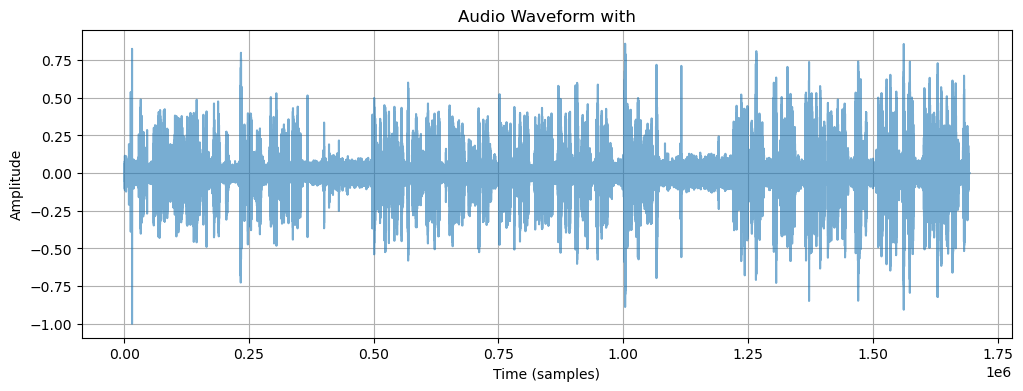

In [45]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

audio_file = r"C:\Users\Anjali\Downloads\storytelling4.mp4"  
y, sr = librosa.load(audio_file, sr=16000)

y_normalized = y / np.max(np.abs(y)) 

plt.figure(figsize=(12, 4)) 
plt.plot(y_normalized, alpha=0.6) 
plt.title('Audio Waveform with')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



In [41]:
import csv
import os


output_file = 'results.csv'

def save_to_csv(sentiment_final, variance_final):
    """
    Save sentiment and pitch variance to a tab-separated CSV file.

    Args:
        sentiment_final (str): Sentiment value (Positive, Neutral, Negative).
        variance_final (float): Calculated pitch variance.
    """
    file_exists = os.path.isfile(output_file)

    with open(output_file, mode='a', newline='') as file:
        writer = csv.writer(file, delimiter='\t')  

        
        if not file_exists:
            writer.writerow(['sentiment_final', 'variance_final'])

      
        writer.writerow([sentiment_final, variance_final])

    print(f"Saved: sentiment_final = {sentiment_final}, variance_final = {variance_final}")


save_to_csv(sentiment_final, variance_final)


Saved: sentiment_final = neutral, variance_final = 4045.363102468909


In [1]:
! pip install scikit-learn



Stress Prediction

In [7]:
import pandas as pd
import numpy as np

if sentiment_final == 'positive':
    sentiment_value = 3
elif sentiment_final == 'neutral':
    sentiment_value = 2
else:  # 'negative'
    sentiment_value = 1


if variance_final > 2126:
    variance_value = 4
elif 1063 <= variance_final <= 2126:
    variance_value = 2
else:  # variance_final < 1063
    variance_value = 0


final_value = sentiment_value + variance_value


if final_value <= 2:
    stress_label = 'High Stress'
elif 3 <= final_value <= 4:
    stress_label = 'Mild Stress'
elif 5 <= final_value <= 7:
    stress_label = 'Low Stress'
elif final_value == 8:
    stress_label = 'No Stress'

print(stress_label)



Low Stress
